In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print ('Для age пустых строк {}'.format( len( data[ pd.isnull( data['age'] ) ] )) )
print ('Для education пустых строк {}'.format( len( data[ pd.isnull( data['education'] ) ] ) ))
print ('Для educational-num пустых строк {}'.format( len( data[ pd.isnull( data['educational-num'] ) ] ) ))
print ('Для occupation пустых строк {}'.format( len( data[ pd.isnull( data['occupation'] ) ] ) ))
print ('Для occupation строк с вопросительными знаками {}'.format( len( data[ data['occupation'] == '?'  ] ) ))
print ('Для race пустых строк {}'.format( len( data[ pd.isnull( data['race'] ) ] ) ))
print ('Для gender пустых строк {}'.format( len( data[ pd.isnull( data['gender'] ) ] ) ))
print ('Для hours-per-week пустых строк {}'.format( len( data[ pd.isnull( data['hours-per-week'] ) ] ) ))
print ('Для native-country пустых строк {}'.format( len( data[ pd.isnull( data['native-country'] ) ] ) ))
print ('Для native-country строк с вопросительными знаками {}'.format( len( data[ data['native-country'] == '?'  ] ) ))
print ('Всего строк в наборе {}'.format( len( data ) ))

Для age пустых строк 0
Для education пустых строк 0
Для educational-num пустых строк 0
Для occupation пустых строк 0
Для occupation строк с вопросительными знаками 2809
Для race пустых строк 0
Для gender пустых строк 0
Для hours-per-week пустых строк 0
Для native-country пустых строк 0
Для native-country строк с вопросительными знаками 857
Всего строк в наборе 48842


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
X = data[ ['educational-num','capital-loss','capital-gain','age', 'hours-per-week','workclass','education', 'occupation', 'native-country', 'race', 'gender','relationship','marital-status'] ]

In [51]:
X = pd.get_dummies(X, columns=['educational-num','capital-loss','age','hours-per-week','capital-gain','workclass','education','occupation', 'native-country','race', 'gender','relationship','marital-status'])

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
le.fit( data['income'] )

LabelEncoder()

In [54]:
y = pd.Series( data = le.transform( data['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Name\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Name\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\Name\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8764758070019791

In [60]:
proba = model.predict_proba(X_test)
preds = model.predict(X_test)

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score( y_test, proba[:, 1] )

0.9315165761492005

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
from sklearn.metrics import average_precision_score

In [64]:
average_precision_score( y_test, proba[:, 1] )

0.8388368826549838

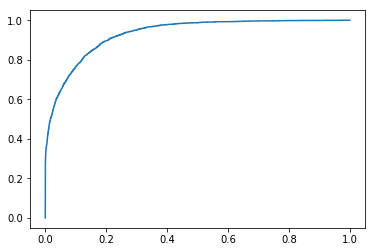

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( y_test, proba[:, 1] )
plt.plot( fpr, tpr )

In [66]:
from sklearn.metrics import auc

In [67]:
auc( fpr, tpr )

0.9315165761492005